# Qiskit Runtime

GitHub : https://github.com/Qiskit/qiskit-ibm-runtime  
Documentation : https://qiskit.org/ecosystem/ibm-runtime/  
Platform : https://quantum-computing.ibm.com

## What is Qiskit Runtime

Qiskit Runtime is a cloud-based quantum computing service developed by IBM. It offers computational primitives to perform foundational quantum computing tasks and has built-in error suppression and mitigation. In addition, Qiskit Runtime has sessions, which allow you to run your circuits on a quantum computer without being interrupted by other users’ jobs. The combination of primitives, error suppression / mitigation, and sessions paves the way to efficiently build and execute scalable quantum applications.

The following figure illustrates how one can use Qiskit Runtime sessions and primitives. The first session request (job) waits through the regular fair-share queue. When it starts to run, the session is started. After the first session job is finished processing, the next job in the session is run. This process continues until the session is paused (due to a lack of queued session jobs) or closed.



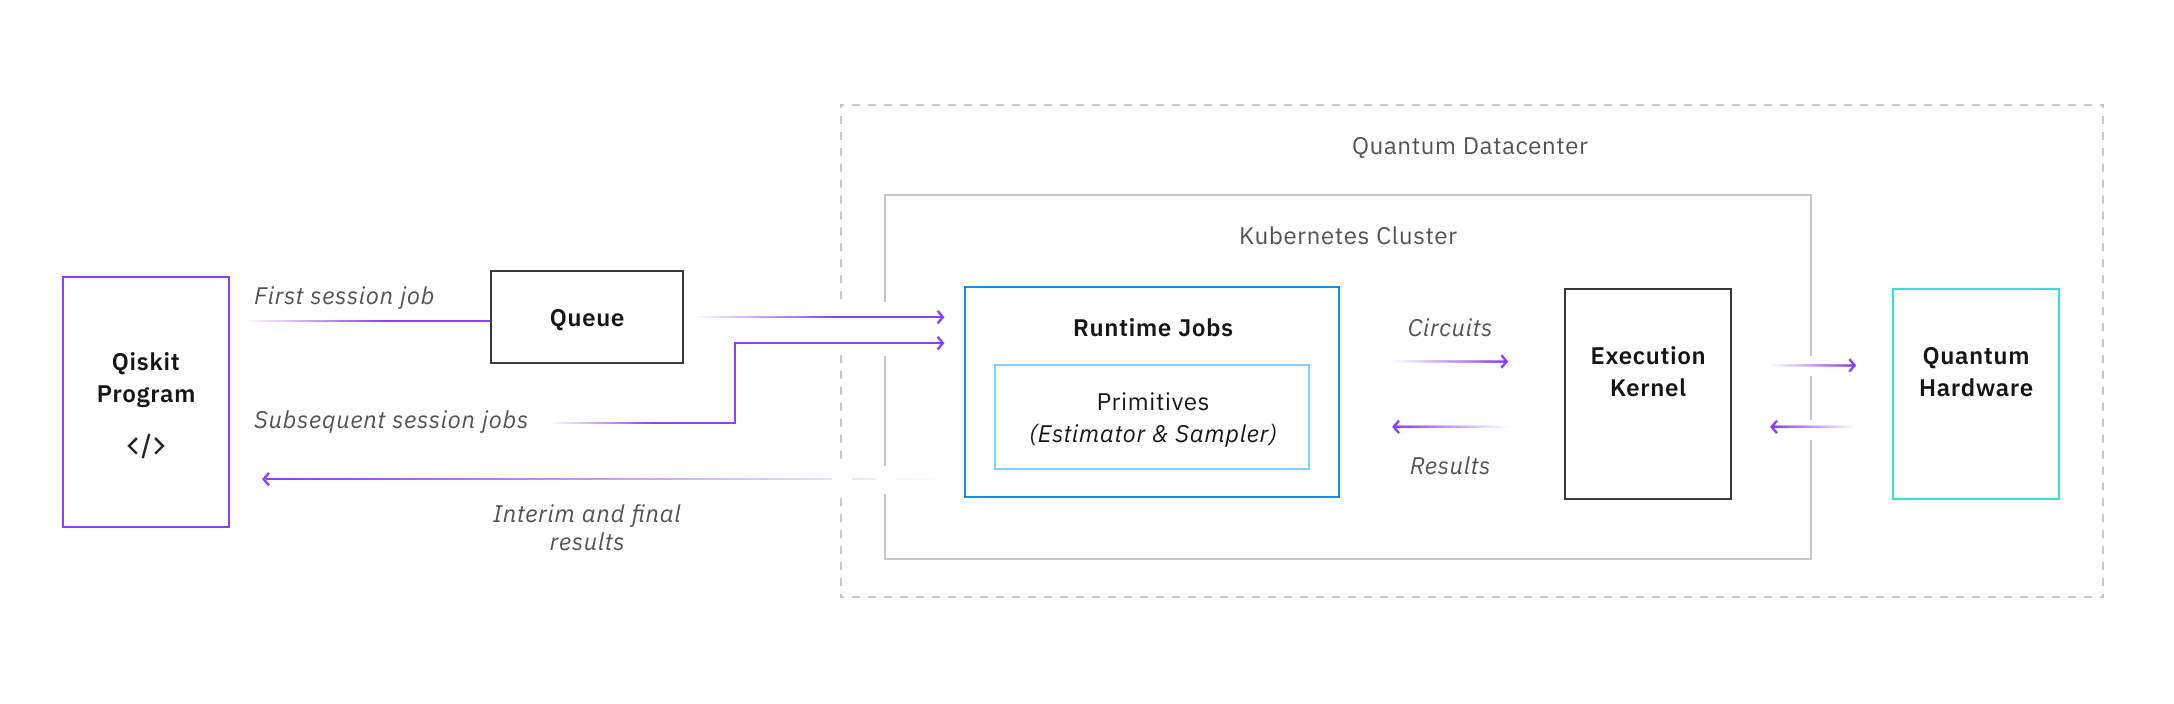

The main concepts we are going to go over for the following session are : 
- **Primitives** : they serve as building blocks for many quantum algorithms and applications. Rather than simply returning counts, they return more immediately meaningful information. Additionally, they provide a seamless way to access the latest optimizations in IBM Quantum hardware and software. Right now, two primitives are available on Qiskit : 
    - **Estimator** : evaluate expectation values and variances for a parameter input.
    - **Sampler** : generate quasiprobabilities.
- **Error suppression/mitigation** : since noise is right now inevitable when running on quantum computers, we need to be able to reduce it as much as possible via error mitigation and error suppression. Techniques for both are directly available via the primitives interface.
- **Session** : it is a tool that allows to send a collection of jobs at the same time on the backend either for batch or iterative executions, making you avoid the queueing process each time a new job has to start. 

## Getting started with Qiskit Runtime


### How to set up Qiskit Runtime

If it is not done already, you need to install the `qiskit-ibm-runtime` package. It lets you run circuits by creating jobs via the Qiskit Runtime primitives.

    pip install qiskit-ibm-runtime

Once it is done, then you have to save your account to the disk. Note that if you already did save an account with `qiskit-ibm-provider` then it wouldn't be necessarry. You can check the accounts you have saved this way :

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [2]:
QiskitRuntimeService.saved_accounts()

{'default-ibm-quantum': {'channel': 'ibm_quantum',
  'token': 'f526c51ca0a31328d50b7ac26d6794edf1c53fbac6b40c5171e318f09d1ede73464e0185e4d03e4892117304ae5c8d424c236539d051e70dd0cbc244fd30eb5a',
  'url': 'https://auth.quantum-computing.ibm.com/api',
  'verify': True}}

If you don't have any account noted as an `ibm_quantum` channel then you will first need to save an account using this channel. 
To do so, you will have to acquire your API token for your account, the token can be found on the dashboard of the IBM Quantum Platform https://quantum-computing.ibm.com.  
You can put several options in addition to the API token when you save your account:
- `instance` : a str representing the hub/group/project you want to charge each time you want to access your account.
- `name` : a str to name the saved account. This is optional.

Here is an example of the instance that we have for the workshop.

In [6]:
# token = ''
# instance = 'ibm-q/open/main'
# name = 'your_name_the_test'

In [7]:
# QiskitRuntimeService.save_account(channel = "ibm_quantum", # optional, but we will be using the ibm_quantum channel for this notebook
#                                   token = token, 
#                                   instance = instance,
#                                   name = name, # optional
#                                  )

Let's now see what accounts we have saved.

In [8]:
QiskitRuntimeService.saved_accounts()

{'default-ibm-quantum': {'channel': 'ibm_quantum',
  'token': 'f526c51ca0a31328d50b7ac26d6794edf1c53fbac6b40c5171e318f09d1ede73464e0185e4d03e4892117304ae5c8d424c236539d051e70dd0cbc244fd30eb5a',
  'url': 'https://auth.quantum-computing.ibm.com/api',
  'verify': True}}

It is also posssible to delete an account if you need to with the method `QiskitRuntimeService.delete_account()` by passing either the *name* or the *channel* of the account you want to delete.

### Initialize your account

Now that your account is saved on the device, all you need to do to access your account is to load the service. 
It is possible to load an instance when you accessed the service, this is done by passing the instance as a parameter in the same way as was done when using the `save_account` method. 

In [3]:
instance = 'ibm-q/open/main'
service = QiskitRuntimeService(channel='ibm_quantum', instance=instance)

### Access backends

You have access to the backend through the service. To get the list of all available backends, you can do this :

In [4]:
service.backends()

[<IBMBackend('ibm_lagos')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_perth')>]

You can also add filters to this task, specifying criteria that you would like the backends to satisfy.

Let's try to get back backends that are 
- real quantum devices, 
- currently operational 
- with at least 7 qubits : 

In [5]:
service.backends(simulator = False, operational = True, min_num_qubits = 7)

[<IBMBackend('ibm_lagos')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_perth')>]

Another method also exists to get back the least busy backend you have access to. It takes the same arguments as the `backends()` method but return the backend with the smallest number of jobs pending in the queue.

In [6]:
service.least_busy(simulator = False, operational = True, min_num_qubits = 7)

<IBMBackend('ibm_lagos')>

You also have the possibility to do some more complex filtering if you want, for example `QiskitRuntimeService.backends(filters=lambda b: b.max_shots > 50000)filters=lambda b: b.max_shots > 50000)`. 

Moreover, any filters requiring specific value for an attribute in backen status or configuration would work.  
You can find here in [the documentation](https://qiskit.org/ecosystem/ibm-runtime/stubs/qiskit_ibm_runtime.IBMBackend.html) all attributes and methods you need to access relevant information about the backends.